In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
df = df.fillna(0)

In [6]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [7]:
df['rooms_per_household'] = df['total_rooms'] / df['households']

In [8]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853


In [9]:
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

In [10]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


### Question 1

In [11]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [12]:
df.dtypes

longitude                   float64
latitude                    float64
housing_median_age          float64
total_rooms                 float64
total_bedrooms              float64
population                  float64
households                  float64
median_income               float64
median_house_value          float64
ocean_proximity              object
rooms_per_household         float64
bedrooms_per_room           float64
population_per_household    float64
dtype: object

### Question 2

In [13]:
numerical = ['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value','rooms_per_household','bedrooms_per_room','population_per_household']

In [14]:
numerical_df = df[numerical]

In [15]:
corr_matrix = numerical_df.corr()

In [16]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.924664,-0.108197,0.044568,0.068082,0.099773,0.055310,-0.015176,-0.045967,-0.027540,0.084836,0.002476
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.065318,-0.108785,-0.071035,-0.079809,-0.144160,0.106389,-0.104112,0.002366
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.317063,-0.296244,-0.302916,-0.119034,0.105623,-0.153277,0.125396,0.013191
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.920196,0.857126,0.918484,0.198050,0.134153,0.133798,-0.174583,-0.024581
total_bedrooms,0.068082,-0.065318,-0.317063,0.920196,1.000000,0.866266,0.966507,-0.007295,0.049148,0.002717,0.122205,-0.028019
population,0.099773,-0.108785,-0.296244,0.857126,0.866266,1.000000,0.907222,0.004834,-0.024650,-0.072213,0.031397,0.069863
households,0.055310,-0.071035,-0.302916,0.918484,0.966507,0.907222,1.000000,0.013033,0.065843,-0.080598,0.059818,-0.027309
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007295,0.004834,0.013033,1.000000,0.688075,0.326895,-0.573836,0.018766
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049148,-0.024650,0.065843,0.688075,1.000000,0.151948,-0.238759,-0.023737
rooms_per_household,-0.027540,0.106389,-0.153277,0.133798,0.002717,-0.072213,-0.080598,0.326895,0.151948,1.000000,-0.387465,-0.004852


In [17]:
import seaborn as sns

<AxesSubplot:>

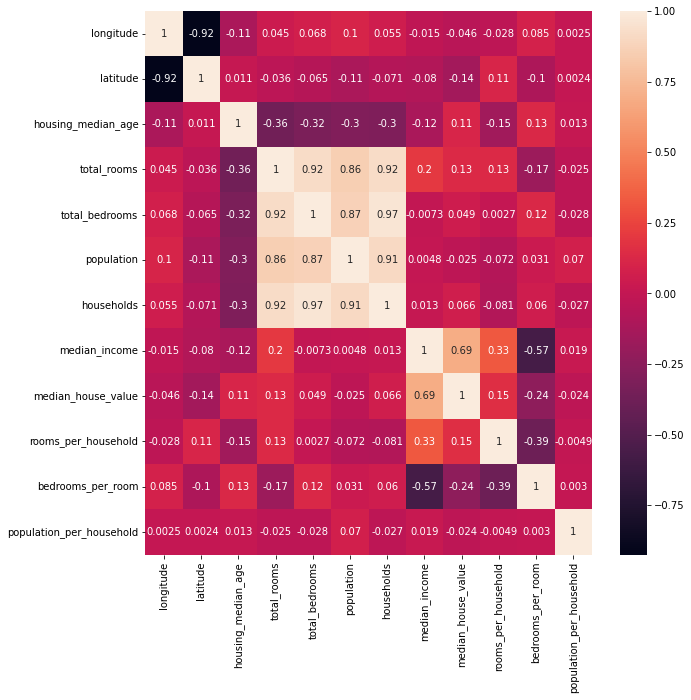

In [18]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_matrix, annot = True)

In [19]:
sort = numerical_df.corr().unstack().sort_values(ascending = False).drop_duplicates()
sort

longitude            longitude            1.000000
total_bedrooms       households           0.966507
total_rooms          total_bedrooms       0.920196
                     households           0.918484
population           households           0.907222
                                            ...   
housing_median_age   total_bedrooms      -0.317063
                     total_rooms         -0.361262
rooms_per_household  bedrooms_per_room   -0.387465
bedrooms_per_room    median_income       -0.573836
longitude            latitude            -0.924664
Length: 67, dtype: float64

### Question 3

In [20]:
df.median_house_value

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [21]:
mean = df.median_house_value.mean()
mean

206855.81690891474

In [22]:
df['above_average'] = (df.median_house_value > mean).astype(int)

In [23]:
df.head(20)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,above_average
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467,1
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,4.761658,0.231774,2.139896,1
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,4.931907,0.192899,2.128405,1
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY,4.797527,0.221327,1.788253,1
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,4.294118,0.260274,2.026891,1
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY,4.970588,0.199211,2.172269,1


In [24]:
df.above_average.value_counts()

0    12255
1     8385
Name: above_average, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state = 42 )

In [26]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state =42 )

In [27]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,above_average
17244,-119.67,34.43,39.0,1467.0,381.0,1404.0,374.0,2.3681,241400.0,<1H OCEAN,3.922460,0.259714,3.754011,1
8817,-118.32,33.74,24.0,6097.0,794.0,2248.0,806.0,10.1357,500001.0,NEAR OCEAN,7.564516,0.130228,2.789082,1
19686,-121.62,39.13,41.0,1317.0,309.0,856.0,337.0,1.6719,64100.0,INLAND,3.908012,0.234624,2.540059,0
3545,-118.63,34.24,9.0,4759.0,924.0,1884.0,915.0,4.8333,277200.0,<1H OCEAN,5.201093,0.194158,2.059016,1
17019,-122.30,37.52,38.0,2769.0,387.0,994.0,395.0,5.5902,417000.0,NEAR OCEAN,7.010127,0.139762,2.516456,1


In [28]:
len(df_train), len(df_val), len(df_test)

(12384, 4128, 4128)

In [29]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [30]:
y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

In [31]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [32]:
from sklearn.metrics import mutual_info_score

In [33]:
df_full_train.dtypes   # ocean_proximity is the categorical variable

longitude                   float64
latitude                    float64
housing_median_age          float64
total_rooms                 float64
total_bedrooms              float64
population                  float64
households                  float64
median_income               float64
median_house_value          float64
ocean_proximity              object
rooms_per_household         float64
bedrooms_per_room           float64
population_per_household    float64
above_average                 int32
dtype: object

In [34]:
mutual_information_score = mutual_info_score(df_full_train.ocean_proximity, df_full_train.above_average)
mutual_information_score

0.1019224615118327

In [35]:
mutual_information_score.round(2)

0.1

### Question 4

In [36]:
from sklearn.feature_extraction import DictVectorizer

In [37]:
train_dicts = df_train.to_dict(orient = 'records')

In [38]:
train_dicts[0]

{'longitude': -119.67,
 'latitude': 34.43,
 'housing_median_age': 39.0,
 'total_rooms': 1467.0,
 'total_bedrooms': 381.0,
 'population': 1404.0,
 'households': 374.0,
 'median_income': 2.3681,
 'ocean_proximity': '<1H OCEAN',
 'rooms_per_household': 3.9224598930481283,
 'bedrooms_per_room': 0.25971370143149286,
 'population_per_household': 3.7540106951871657,
 'above_average': 1}

In [39]:
dv = DictVectorizer(sparse = False)

In [40]:
dv.fit(train_dicts)

DictVectorizer(sparse=False)

In [41]:
dv.get_feature_names()

C:\Users\GODIAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['above_average',
 'bedrooms_per_room',
 'households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity=<1H OCEAN',
 'ocean_proximity=INLAND',
 'ocean_proximity=ISLAND',
 'ocean_proximity=NEAR BAY',
 'ocean_proximity=NEAR OCEAN',
 'population',
 'population_per_household',
 'rooms_per_household',
 'total_bedrooms',
 'total_rooms']

In [42]:
X_train = dv.transform(train_dicts)
X_train.shape

(12384, 17)

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
y_train =  df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

In [45]:
del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

In [46]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-119.67,34.43,39.0,1467.0,381.0,1404.0,374.0,2.3681,<1H OCEAN,3.922460,0.259714,3.754011
1,-118.32,33.74,24.0,6097.0,794.0,2248.0,806.0,10.1357,NEAR OCEAN,7.564516,0.130228,2.789082
2,-121.62,39.13,41.0,1317.0,309.0,856.0,337.0,1.6719,INLAND,3.908012,0.234624,2.540059
3,-118.63,34.24,9.0,4759.0,924.0,1884.0,915.0,4.8333,<1H OCEAN,5.201093,0.194158,2.059016
4,-122.30,37.52,38.0,2769.0,387.0,994.0,395.0,5.5902,NEAR OCEAN,7.010127,0.139762,2.516456


In [47]:
train_dicts = df_train.to_dict(orient = 'records')

In [48]:
train_dicts[0]

{'longitude': -119.67,
 'latitude': 34.43,
 'housing_median_age': 39.0,
 'total_rooms': 1467.0,
 'total_bedrooms': 381.0,
 'population': 1404.0,
 'households': 374.0,
 'median_income': 2.3681,
 'ocean_proximity': '<1H OCEAN',
 'rooms_per_household': 3.9224598930481283,
 'bedrooms_per_room': 0.25971370143149286,
 'population_per_household': 3.7540106951871657}

In [49]:
dv = DictVectorizer(sparse = False)

In [50]:
dv.fit(train_dicts)

DictVectorizer(sparse=False)

In [51]:
dv.get_feature_names()

C:\Users\GODIAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['bedrooms_per_room',
 'households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity=<1H OCEAN',
 'ocean_proximity=INLAND',
 'ocean_proximity=ISLAND',
 'ocean_proximity=NEAR BAY',
 'ocean_proximity=NEAR OCEAN',
 'population',
 'population_per_household',
 'rooms_per_household',
 'total_bedrooms',
 'total_rooms']

In [52]:
X_train = dv.transform(train_dicts)
X_train.shape

(12384, 16)

In [53]:
model = LogisticRegression(solver='liblinear', C= 1.0, max_iter= 1000, random_state =42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [54]:
val_dicts = df_val.to_dict(orient = 'records')

In [55]:
X_val = dv.fit_transform(val_dicts)
X_val.shape

(4128, 16)

In [56]:
y_pred = model.predict_proba(X_val)[:, 1]

In [57]:
prediction = (y_pred >= 0.5)

In [58]:
accuracy = (y_val == prediction).mean()
accuracy

0.8357558139534884

In [59]:
accuracy.round(2)

0.84

### Question 6

In [60]:
df['median_house_value'] = np.log1p(df['median_house_value'].values)

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state = 42 )
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state =42 )

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

train_dicts = df_train.to_dict(orient = 'records')
dv = DictVectorizer(sparse = False)
dv.fit(train_dicts)
X_train = dv.transform(train_dicts)
X_train.shape

val_dicts = df_val.to_dict(orient = 'records')
X_val = dv.fit_transform(val_dicts)
X_val.shape


del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

from sklearn.linear_model import Ridge


for a in [0, 0.01, 0.1, 1, 10]:
    ridge_reg = Ridge(alpha = a, solver ='sag', random_state = 42)
    ridge_reg.fit(X_train, y_train)
    
    predicted_values = ridge_reg.predict(X_val)
    
    from sklearn.metrics import mean_squared_error
    
    rmse = np.sqrt(mean_squared_error(y_val, predicted_values))
    score = round(rmse,3)
    
    
    
    print(a, score)


0 0.523
0.01 0.523
0.1 0.523
1 0.523
10 0.523
